# Diurnal Histogram

In [1]:
import pandas as pd
import glob

In [2]:
#load wrf-bcc dataframes
df_HIST = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_[21]*_*')), ignore_index=True)
df_8p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC8p5_UVV*')), ignore_index=True)
df_4p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC4p5_UVV*')), ignore_index=True)
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)
df_4p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC4p5_UVV*')), ignore_index=True)

#iterate through the epochs and threshold each based on UVV value
epochs = ['HIST', '4p5MID', '8p5MID', '4p5END', '8p5END']

for epoch in epochs:
    locals()[f'df_{epoch}'] = locals()[f'df_{epoch}'][((locals()[f'df_{epoch}']['DBZ'] >= 40.0) & (locals()[f'df_{epoch}']['UVV'] >= 25.0))]
    locals()[f'df_{epoch}']['Time'] = pd.to_datetime( locals()[f'df_{epoch}']['Time'])
    locals()[f'df_{epoch}']['Month'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.month
    locals()[f'df_{epoch}']['Hour'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.hour
    

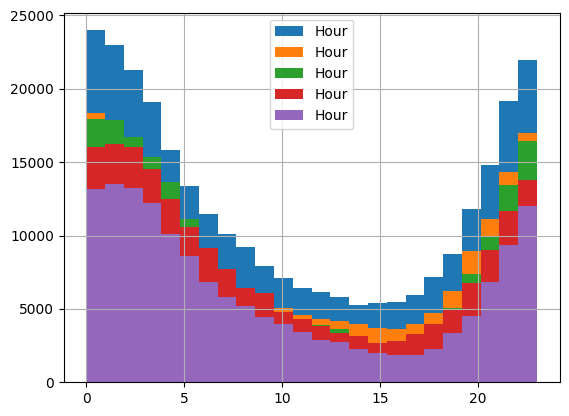

In [3]:
epochs = ['8p5END', '4p5END', '8p5MID', '4p5MID', 'HIST']

for epoch in epochs:
    locals()[f'df_{epoch}']['Hour'].hist(bins=24, legend=True)

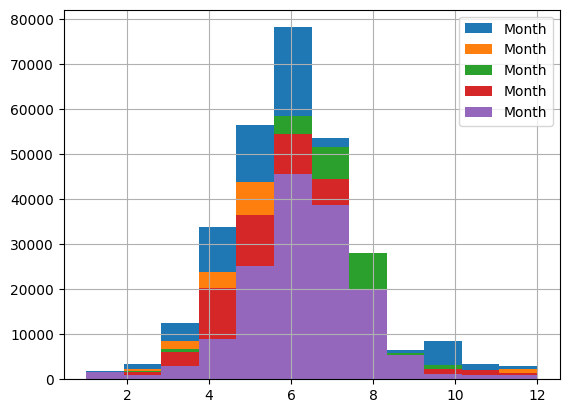

In [4]:
epochs = ['8p5END', '4p5END', '8p5MID', '4p5MID', 'HIST']

for epoch in epochs:
    locals()[f'df_{epoch}']['Month'].hist(bins=12, legend=True)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [6]:
#load wrf-bcc dataframes
df_HIST = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_[21]*_*')), ignore_index=True)
df_8p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC8p5_UVV*')), ignore_index=True)
df_4p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC4p5_UVV*')), ignore_index=True)
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)
df_4p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC4p5_UVV*')), ignore_index=True)

In [7]:
#iterate through the epochs
epochs = ['HIST', '4p5MID', '8p5MID', '4p5END', '8p5END']
epoch_labels = ['HIST', 'MID4.5', 'MID8.5', 'END4.5', 'END8.5']


for epoch in epochs:
    
    #load wrf-bcc dataframes and append appropiate information to dataframe.
    print(epoch)
    locals()[f'df_{epoch}'] = locals()[f'df_{epoch}'][((locals()[f'df_{epoch}']['DBZ'] >= 40.0) & (locals()[f'df_{epoch}']['UVV'] >= 25.0))]
    locals()[f'df_{epoch}']['Time'] = pd.to_datetime( locals()[f'df_{epoch}']['Time'])
    locals()[f'df_{epoch}']['Month'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.month
    locals()[f'df_{epoch}']['Year'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.year
    locals()[f'df_{epoch}']['Day'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.day
    locals()[f'df_{epoch}']['Hour'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.hour
    locals()[f'df_{epoch}']['New_Hour'] = pd.to_datetime((locals()[f'df_{epoch}']['Time']) + pd.DateOffset(hours=12)).dt.hour

HIST
4p5MID
8p5MID
4p5END
8p5END


/tmp/ipykernel_56467/119510795.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels, fontsize=25)


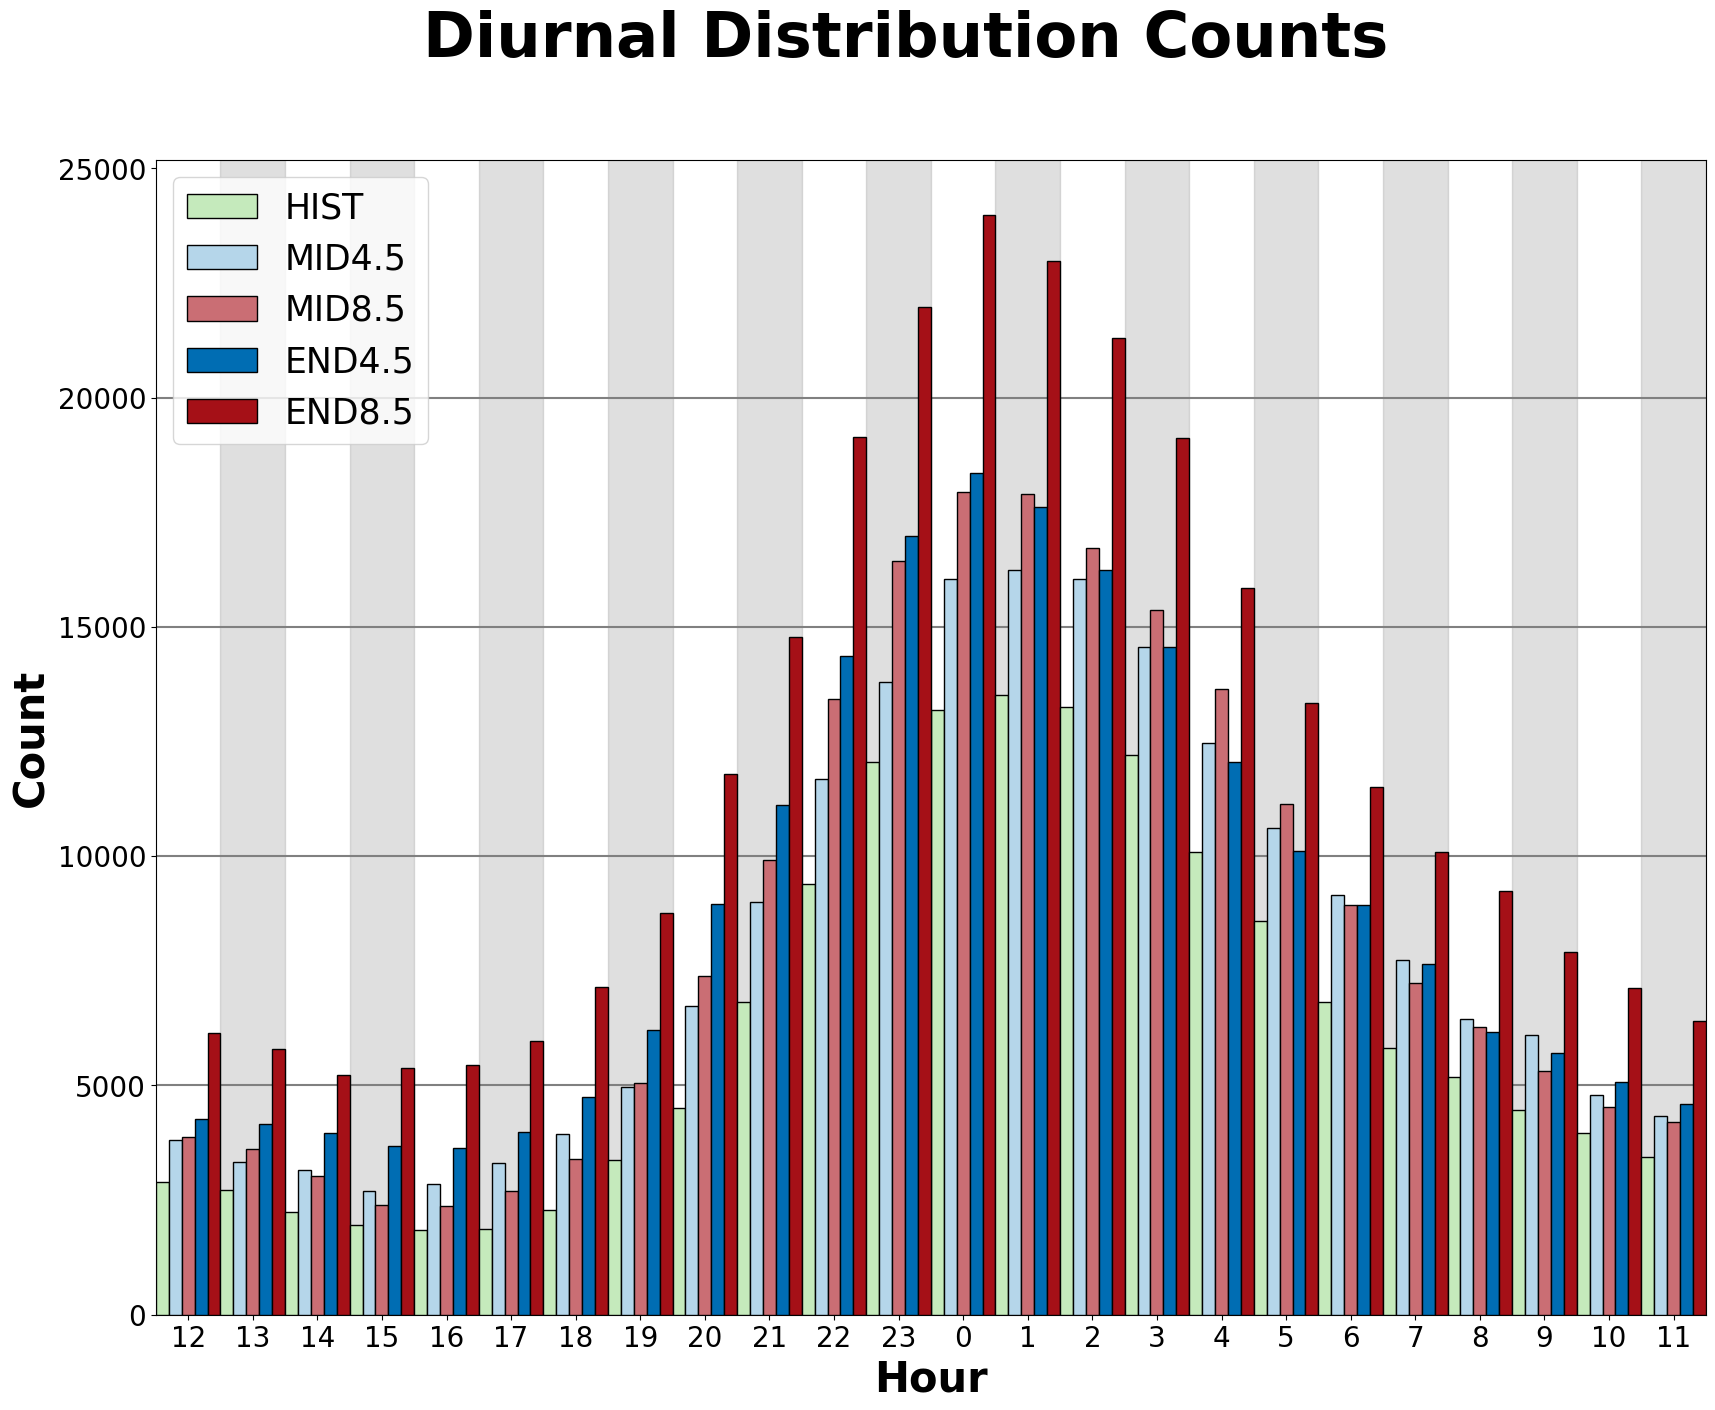

In [24]:
# plot diurnal distribution of HCW counts
fig = plt.figure(figsize=(20,15))

#All modes, regions, and seasons Diurnal Bar Graph
colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
pos = [-0.4, -0.2, 0, 0.2, 0.4]

plt.suptitle('Diurnal Distribution Counts', size=45).set_weight('bold')

# hours offset, to center 0Z
for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
    values = {}
    
    for epoch in range(len(epochs)):
        sub_df = locals()[f'df_{epochs[epoch]}']
        sub_df = sub_df[(sub_df['New_Hour'] == hour)].copy()
        plt.bar(hour + pos[epoch], len(sub_df), color=colors[epoch], edgecolor='k', width=0.20, zorder=10)
        

plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]), fontsize=20)
plt.xlabel('Hour', fontsize=30).set_weight('bold')
plt.yticks(np.arange(0,25001,5000), fontsize=20)
plt.ylabel('Count', fontsize=30).set_weight('bold')
plt.xlim(-0.5, 23.5)

plt.legend(colors, labels=epoch_labels, fontsize=25)

# set horizontal grid lines
plt.axhline(y = 5000, color = 'grey', ls='-')
plt.axhline(y = 10000, color = 'grey', ls='-')
plt.axhline(y = 15000, color = 'grey', ls='-')
plt.axhline(y = 20000, color = 'grey', ls='-')

# set vertical alternating grey/white background
plt.axvspan(0.5, 1.5, color='grey', alpha=0.25)
plt.axvspan(2.5, 3.5, color='grey', alpha=0.25)
plt.axvspan(4.5, 5.5, color='grey', alpha=0.25)
plt.axvspan(6.5, 7.5, color='grey', alpha=0.25)
plt.axvspan(8.5, 9.5, color='grey', alpha=0.25)
plt.axvspan(10.5, 11.5, color='grey', alpha=0.25)
plt.axvspan(12.5, 13.5, color='grey', alpha=0.25)
plt.axvspan(14.5, 15.5, color='grey', alpha=0.25)
plt.axvspan(16.5, 17.5, color='grey', alpha=0.25)
plt.axvspan(18.5, 19.5, color='grey', alpha=0.25)
plt.axvspan(20.5, 21.5, color='grey', alpha=0.25)
plt.axvspan(22.5, 23.5, color='grey', alpha=0.25)

# plt.savefig('../Plots/diurnal_all_storms.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

/tmp/ipykernel_56467/4070907312.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors[1:], labels=epoch_labels[1:], fontsize=25)  # exclude HIST from legend


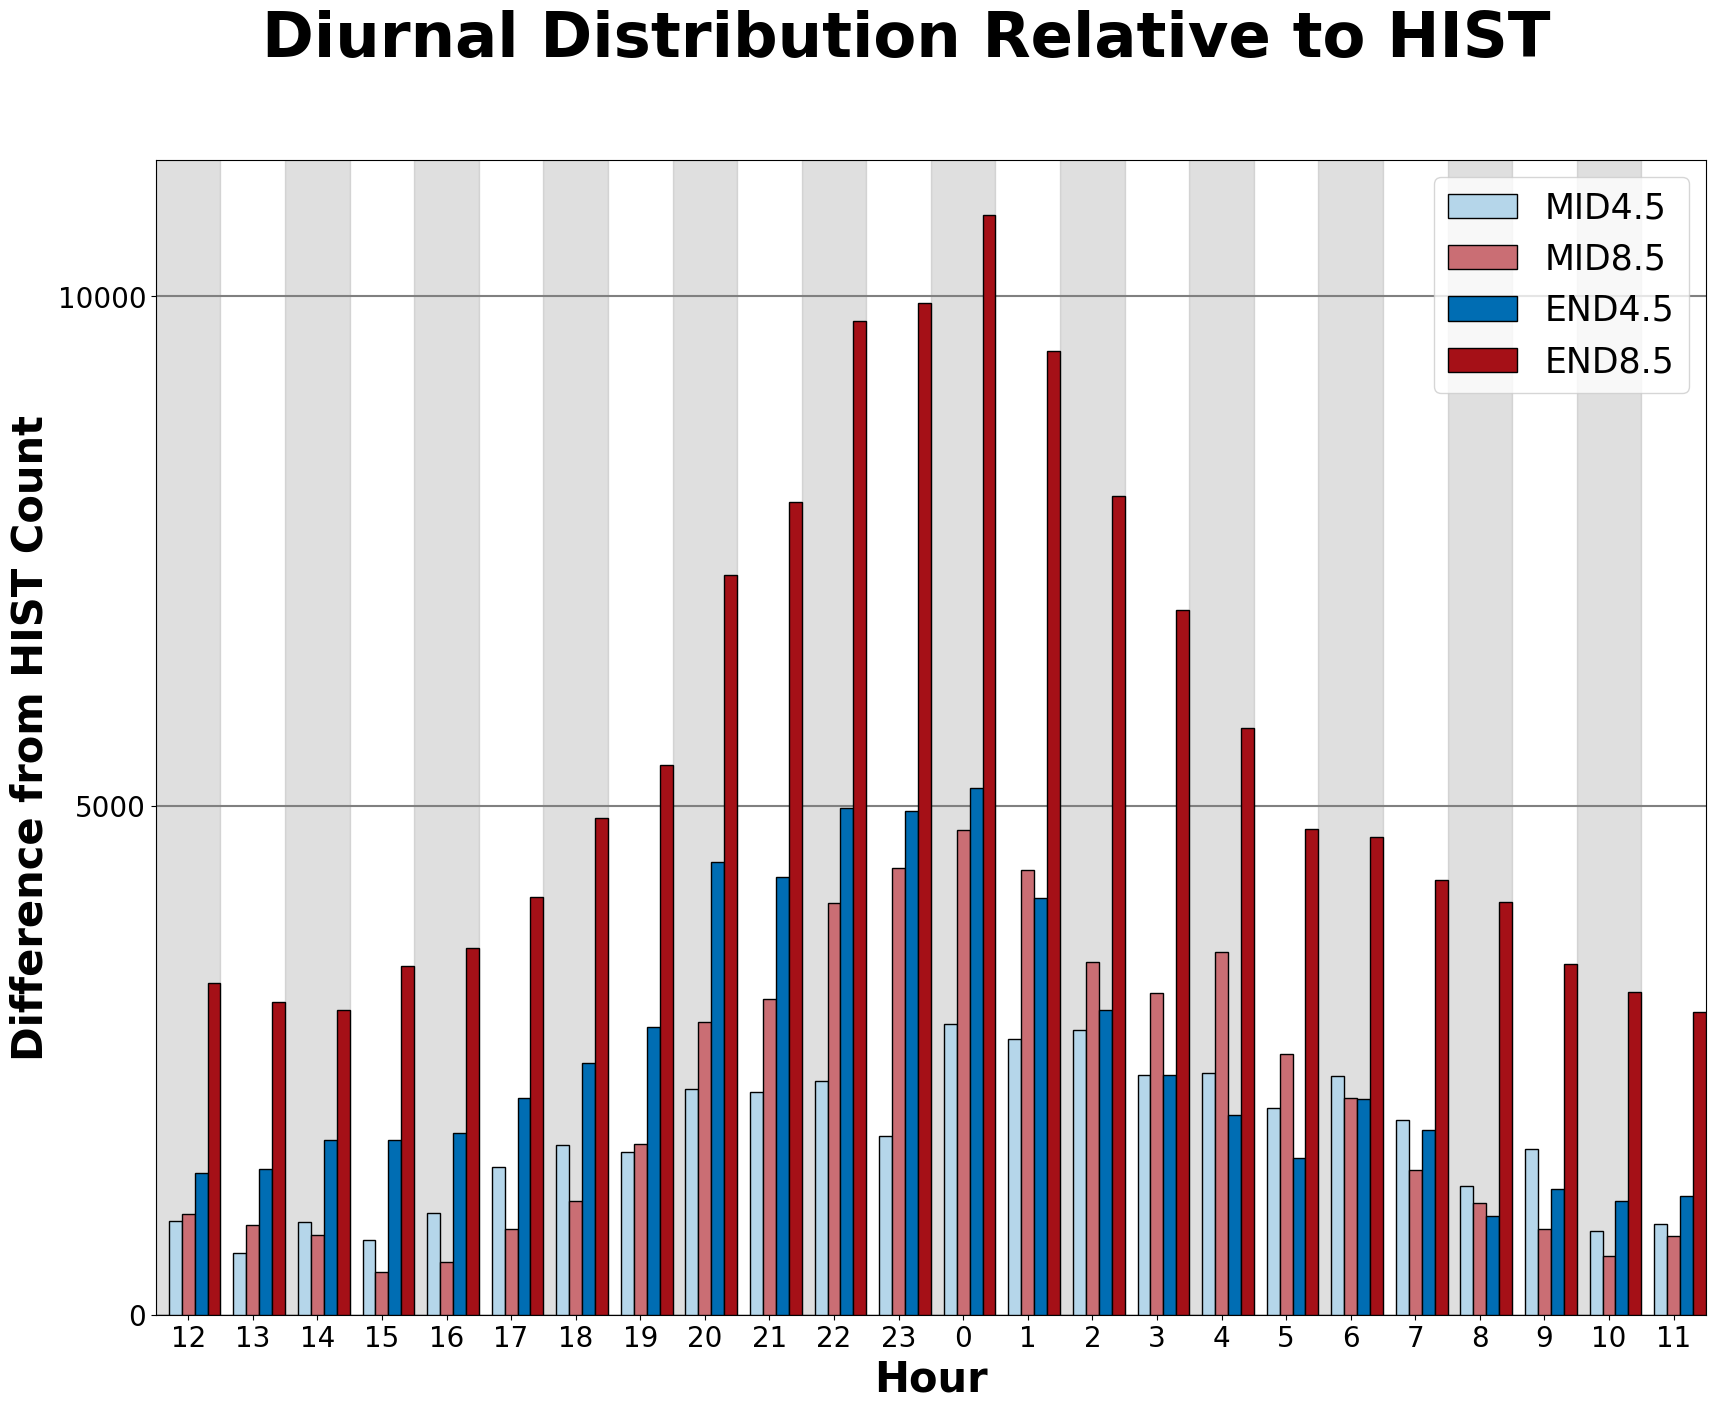

In [32]:
# plot diurnal distribution wrt HIST
colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
pos = [-0.4, -0.2, 0, 0.2, 0.4]

fig = plt.figure(figsize=(20, 15))
plt.suptitle('Diurnal Distribution Relative to HIST', size=45).set_weight('bold')

# hours offset to center 0Z
hours = np.concatenate([np.arange(12, 24, 1), np.arange(0, 12, 1)])

# loop over each hour then plot bar differences for each epoch relative to HIST
for hour in hours:
    # calc baseline HIST epoch
    hist_df = df_HIST[df_HIST['New_Hour'] == hour]
    hist_count = len(hist_df)
    
    for epoch in range(1, len(epochs)):  # skip HIST (index 0) and start from epoch 1
        sub_df = locals()[f'df_{epochs[epoch]}']
        sub_df = sub_df[sub_df['New_Hour'] == hour].copy()
        
        # calc difference from HIST for this hour
        difference = len(sub_df) - hist_count
        
        # plot bar for this epoch at given hour position
        plt.bar(hour + pos[epoch], difference, color=colors[epoch], edgecolor='k', width=0.20, zorder=10)

plt.xticks(np.arange(0, 24, 1), hours, fontsize=20)
plt.xlabel('Hour', fontsize=30).set_weight('bold')

plt.yticks(np.arange(0, 12001, 5000), fontsize=20)
plt.ylabel('Difference from HIST Count', fontsize=30).set_weight('bold')

plt.xlim(-0.5, 23.5)

plt.legend(colors[1:], labels=epoch_labels[1:], fontsize=25)  # exclude HIST from legend

# set horizontal grid lines
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axhline(y=5000, color='grey', linestyle='-')
plt.axhline(y=10000, color='grey', linestyle='-')
# plt.axhline(y=15000, color='grey', linestyle='-')
# plt.axhline(y=20000, color='grey', linestyle='-')

# set vertical grey/white alternating shading
for i in range(0, 24, 2):
    plt.axvspan(i - 0.5, i + 0.5, color='grey', alpha=0.25)

# plt.savefig('../Plots/diurnal_relative_HIST.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

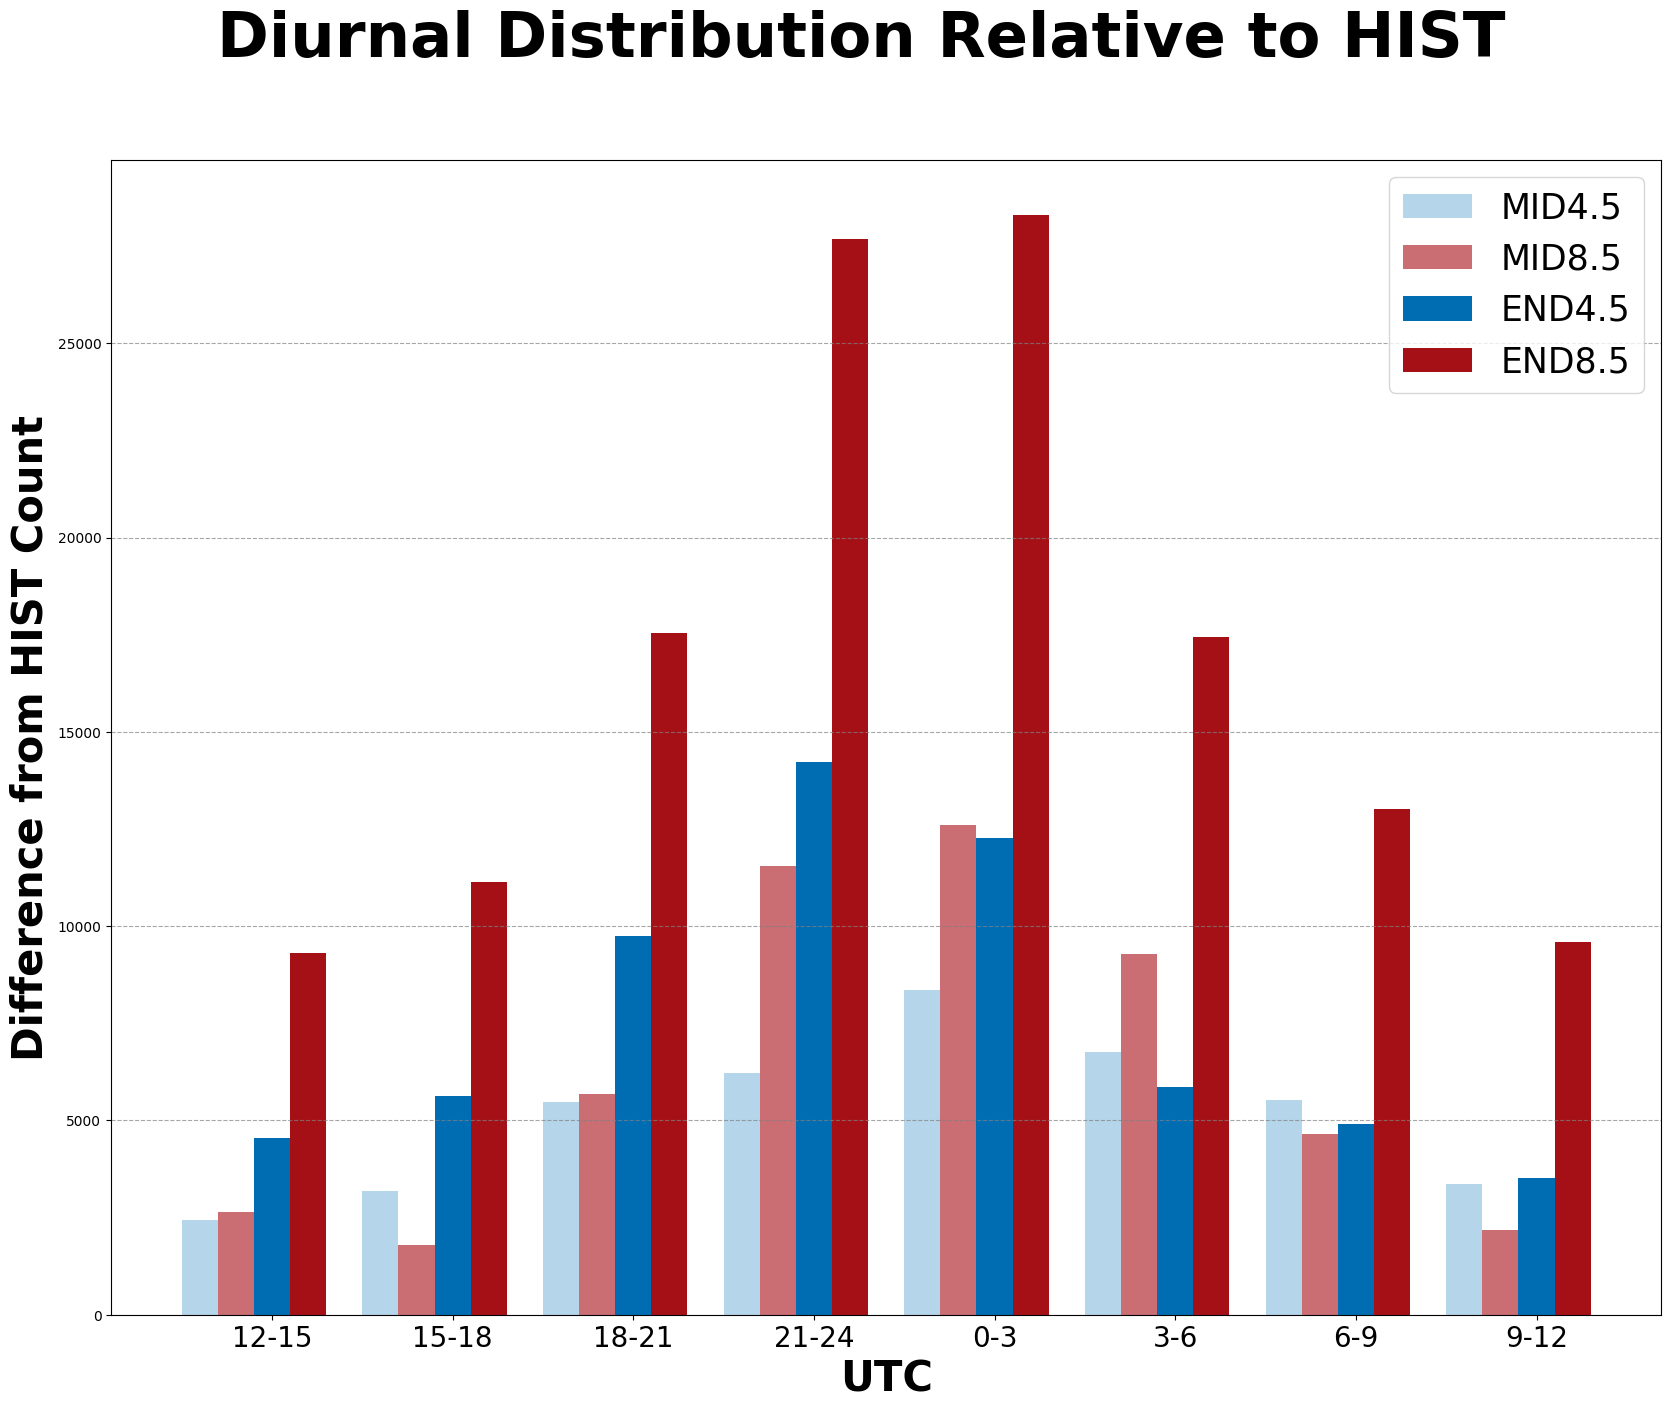

In [31]:
# set up 3 hour bins
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
bin_labels = ['12-15', '15-18', '18-21', '21-24', '0-3', '3-6', '6-9', '9-12']

fig = plt.figure(figsize=(20, 15))
plt.suptitle('Diurnal Distribution Relative to HIST', size=45).set_weight('bold')

# storage bins
binned_counts = {}

# calc binned counts for each epoch
for epoch in epochs:
    sub_df = locals()[f'df_{epoch}']
    
    # bin data by the 'New_Hour' column and count number per bin
    sub_df['Hour_Bin'] = pd.cut(sub_df['New_Hour'], bins=bins, labels=bin_labels, right=False)
    binned_counts[epoch] = sub_df.groupby('Hour_Bin').size()

# set HIST as baseline (0 for each hour bin)
hist_counts = binned_counts['HIST']

# calc difference between HIST and other epochs for each bin
differences = {}
for epoch in epochs[1:]:  # Exclude HIST
    differences[epoch] = binned_counts[epoch] - hist_counts

width = 0.2  # bar width
x = np.arange(len(bin_labels))  # bin positions

# plot each epoch's differences relative to HIST
for i, epoch in enumerate(epochs[1:]):
    plt.bar(x + i * width, differences[epoch], width=width, label=epoch_labels[i + 1], color=colors[i + 1])

plt.xticks(x + width * 2, bin_labels, fontsize=20)
plt.xlabel('UTC', fontsize=30).set_weight('bold')

plt.ylabel('Difference from HIST Count', fontsize=30).set_weight('bold')

plt.legend(fontsize=25)
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.7)

# plt.savefig('../Plots/diurnal_relative_HIST_3hrBIN.png', format='png', dpi=500, bbox_inches='tight')
plt.show()